# IT Academy - Data Science Itinerary


## S03 T01:  exploratory visualization


 **1 :**

    Graphically summarize the date set DelayedFlights.csv


    Create at least one graph for:
    
   + A categorical variable (UniqueCarrier)
   + A numeric variable (ArrDelay)
   + A numeric and a categorical variable (ArrDelay and UniqueCarrier)
   + Two numeric variables (ArrDelay and DepDelay)
   + Three variables (ArrDelay, DepDelay and UniqueCarrier)
   + More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).
   

$~$

[*Here's the link to download the data set*](https://www.kaggle.com/giovamata/airlinedelaycauses)

$~$

+ import the libraries:

$~$

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors
import seaborn as sns


- After downloading the dataset -I saved it in a folders called data: _"./data"_. let's open it:

$~$

In [26]:
path = "./data/DelayedFlights.csv"

+ Let's start by reading the data:

$~$

In [27]:
df = pd.read_csv(path)

$~$

+ #### **A categorical variable (UniqueCarrier):**

$~$

first let's define our variables:

$~$

In [28]:
y = df.UniqueCarrier.value_counts()

labels = y.index

In [29]:
#explode will make some wedge in our chart. it will be helpful to highlight some parts of the chart

explode = [i/24 for i in range(3,len(y)+3)]
for x in explode[0:17]:
    explode[explode.index(x)]=0   #using just the last 3 elements
explode[-1] = 1.2                  

In [30]:
#here will define map of colors for our plotp

normdata = mpl.colors.Normalize(min(y), max(y))  
colormap = mpl.cm.Blues #this line allows us to change the colors
colors =colormap(normdata(y))



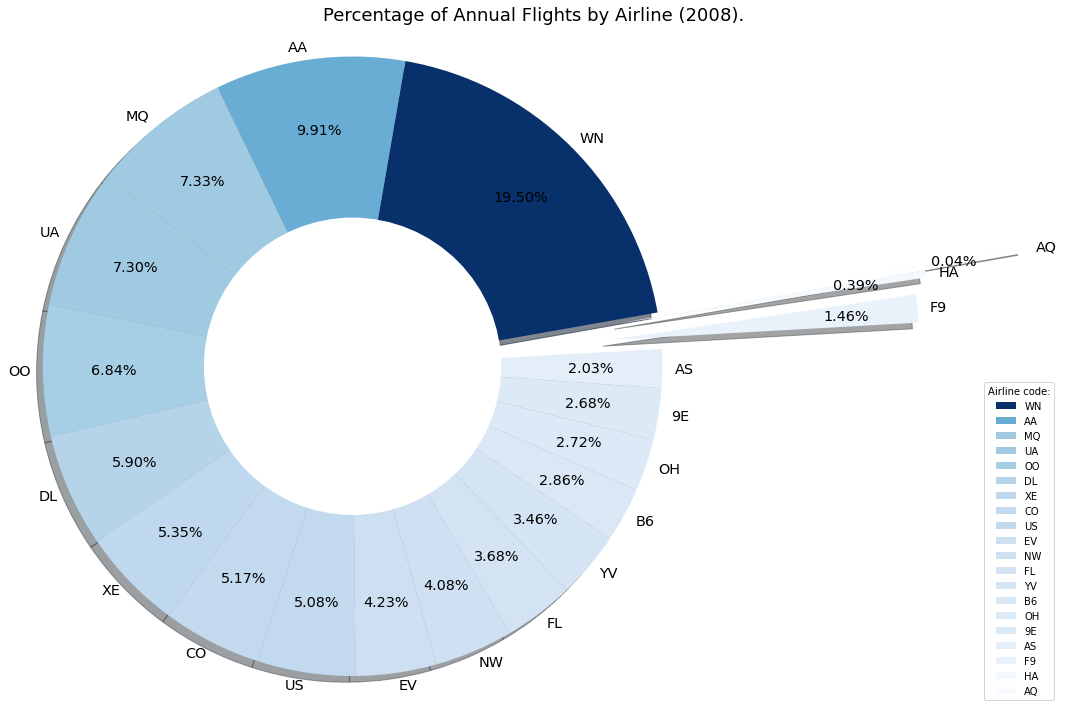

In [31]:
#ploting a pie chart

fig1, ax1 = plt.subplots(figsize=(15,10))

ax1.pie(y, explode=explode, labels=labels, autopct='%.2f%%',pctdistance=0.77,labeldistance=1.04,
        shadow=True, startangle=10, colors=colors,
       textprops={'size': 'x-large'})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Percentage of Annual Flights by Airline (2008).",fontsize=18)

plt.legend(title = "Airline code:",labels=labels,loc="best")


#draw inner circle
centre_circle = plt.Circle((0,0),.48,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)


plt.tight_layout()

plt.savefig('pie_chart.png') #save it

plt.show()


$~$

+ ####  A numeric variable (ArrDelay):

$~$

In [32]:
#let's define our variable:

x =  df.ArrDelay

Let's see how many ouliners we have in our variable using a box plot:

$~$


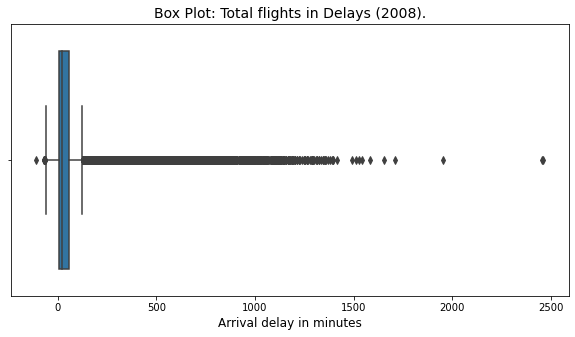

In [33]:
#plotint boxplot chart

fig = plt.figure(figsize=(10,5))

sns.boxplot(x=df.ArrDelay)
plt.title('Box Plot: Total flights in Delays (2008).', fontsize=14)
plt.xlabel("Arrival delay in minutes",fontsize=12)

plt.savefig('boxPlot_ArrDelay.png')

plt.show()

$~$

It looks like there are a lot of outlier points in our data, let's dealing with it:

$~$


In [34]:
#calculate upper and lower limits
upper_limit = df.ArrDelay.mean() + 3 * df.ArrDelay.std()
lower_limit = df.ArrDelay.mean() -3 * df.ArrDelay.std()

#select outliers
df[~((df.ArrDelay < upper_limit) & (df.ArrDelay > lower_limit))]

#outliers removed
new_df = df[(df.ArrDelay < upper_limit) & (df.ArrDelay > lower_limit)]



after cleaning our data, let's define our new variable "x"

$~$

In [35]:
#let's define our new variable:
x = new_df.ArrDelay

$~$
now we can plot out histogram:

$~$

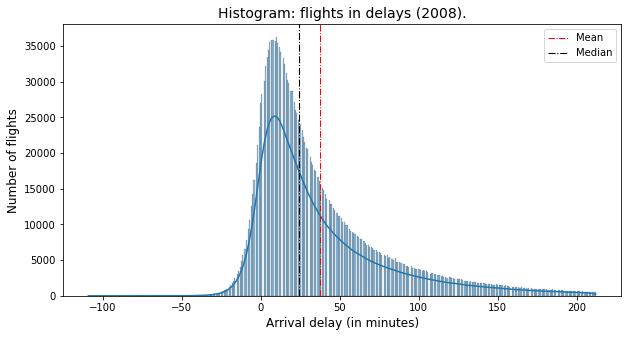

In [36]:
#plotint a histogram

fig = plt.figure(figsize=(10,5))
sns.histplot(x,kde=True)

plt.title('Histogram: flights in delays (2008).', fontsize=14)
plt.xlabel("Arrival delay (in minutes)",fontsize=12)
plt.ylabel("Number of flights",fontsize=12)

plt.axvline(x.mean(), color='red', linestyle='-.', linewidth= 1,label="Mean")
plt.axvline(x.median(), color='black', linestyle='-.', linewidth= 1.1,label="Median")

plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')

plt.savefig('histogram_ArrDelay.png')

plt.show()

$~$
+ #### A numeric and a categorical variable (ArrDelay and UniqueCarrier):

$~$

first let's isolate the variables (ArrDelay and UniqueCarrier) that we want to plot:

$~$

In [37]:
#let's isolate the two variables 
sub_df = df [["UniqueCarrier","ArrDelay"]]

A good practice is to check for null values, let's check it in our new dataframe "sub_df":

$~$

In [38]:
#check for null values in the new dataframe    
print(sub_df.isnull().sum())

UniqueCarrier       0
ArrDelay         8387
dtype: int64


It looks like there are null values in our data, let's dealing with it:

$~$

In [39]:
#drop rows with NaN values
sub_df = sub_df.dropna().reset_index(drop=True)

as we are going to create a bar plot, is more meaningful to make barplot sorted. So we can use “order” argument in Seaborn’s to sort the bars. but we need to provide the x-axis variable in the order we want to plot:

$~$


In [40]:
#generate order to sorting the bars in our plots.
order = sub_df.groupby("UniqueCarrier")["ArrDelay"].sum()
order = order.sort_values()

#we will use order2 to plot the average of arrival delay by airline

order2 =sub_df.groupby("UniqueCarrier")["ArrDelay"].mean()
order2 = order2.sort_values()


now we can generate a plot of ArrDelay and UniqueCarrier:

$~$


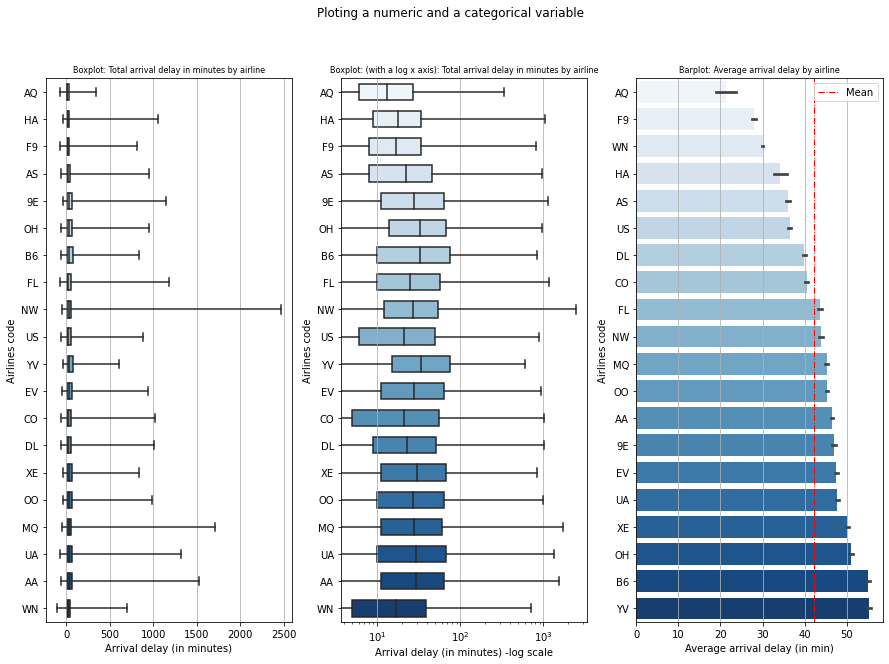

In [41]:
fig,axes = plt.subplots(1, 3, figsize=(15,10))

fig.suptitle("Ploting a numeric and a categorical variable")

sns.boxplot(ax=axes[0],y="UniqueCarrier", x="ArrDelay", data=sub_df,
            whis=[0, 100], width=.6, palette="Blues",order=order.index)

axes[0].set_title("Boxplot: Total arrival delay in minutes by airline",fontsize=8)
axes[0].set_xlabel("Arrival delay (in minutes)")
axes[0].set_ylabel("Airlines code")
axes[0].xaxis.grid(True)


sns.boxplot(ax=axes[1],y="UniqueCarrier", x="ArrDelay", data=sub_df,
            whis=[0, 100], width=.6, palette="Blues",order=order.index)

#figure with a logarithmic x axis
axes[1].set_xscale("log")
axes[1].set_title("Boxplot: (with a log x axis): Total arrival delay in minutes by airline",fontsize=8)
axes[1].set_xlabel("Arrival delay (in minutes) -log scale")
axes[1].set_ylabel("Airlines code")
axes[1].xaxis.grid(True)

sns.barplot(ax=axes[2],y="UniqueCarrier", x="ArrDelay", data=sub_df,
            palette="Blues",order=order2.index)
plt.axvline(sub_df["ArrDelay"].mean(), color='red', linestyle='-.', linewidth= 1,label="Mean")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')


axes[2].xaxis.grid(True)
axes[2].set_title("Barplot: Average arrival delay by airline",fontsize=8)
axes[2].set_xlabel("Average arrival delay (in min)")
axes[2].set_ylabel("Airlines code") 
    
plt.savefig('UniqueCarrier_ArrDelay.png')
    
plt.show()

$~$

+ #### Two numeric variables (ArrDelay and DepDelay):

$~$


first let's isolate the variables (ArrDelay and DepDelay) we want to plot:

$~$

In [42]:
#let's isolate the two variables 

delays_df = df [["ArrDelay", "DepDelay"]]

check for null values in "delays_df":

$~$


In [43]:
print(delays_df.isnull().sum())

ArrDelay    8387
DepDelay       0
dtype: int64


In [44]:
#drop rows with NaN values

delays_df = delays_df.dropna().reset_index(drop=True)

Let's see how many ouliners we have in our variables using a box plot:

$~$



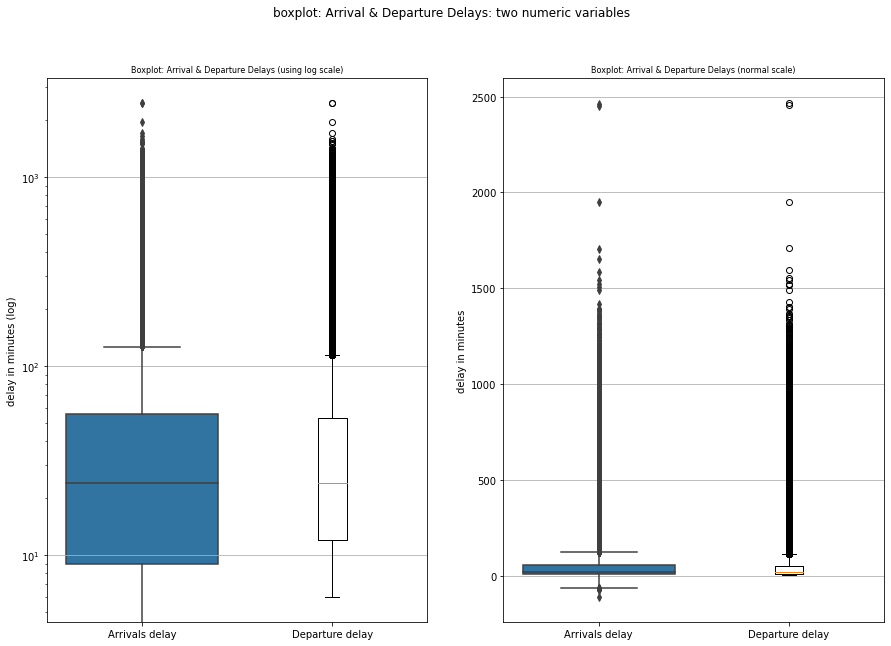

In [45]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("boxplot: Arrival & Departure Delays: two numeric variables")

#plot with log scale
sns.boxplot(ax=axes[0],y=delays_df["ArrDelay"])
axes[0].boxplot(delays_df["DepDelay"])
axes[0].set_xticklabels(["Arrivals delay", "Departure delay"])
axes[0].set_ylabel("delay in minutes (log)")
axes[0].set_title("Boxplot: Arrival & Departure Delays (using log scale)",fontsize=12)
axes[0].set_yscale("log")
axes[0].yaxis.grid(True)

sns.boxplot(ax=axes[1],y=delays_df["ArrDelay"])
axes[1].boxplot(delays_df["DepDelay"])
axes[1].set_xticklabels(["Arrivals delay", "Departure delay"])
axes[1].set_ylabel("delay in minutes")
axes[1].set_title("Boxplot: Arrival & Departure Delays (normal scale)",fontsize=12)
axes[1].yaxis.grid(True)

plt.savefig('Boxplot_Arr_Dep.png')

plt.show()




$~$

It looks like there are a lot of outlier points in our data, let's dealing with it:

$~$


In [46]:
#calculate upper and lower limits
upper_limit_a = delays_df.ArrDelay.mean() + 3 * delays_df.ArrDelay.std()
lower_limit_a = delays_df.ArrDelay.mean() -3 * delays_df.ArrDelay.std()

upper_limit_d = delays_df.DepDelay.mean() + 3 * delays_df.DepDelay.std()
lower_limit_d = delays_df.DepDelay.mean() -3 * delays_df.DepDelay.std()

#select outliers

delays_df[~((delays_df.ArrDelay < upper_limit_a) & (delays_df.ArrDelay > lower_limit_a))]
delays_df[~((delays_df.DepDelay < upper_limit_d) & (delays_df.DepDelay > lower_limit_d))]

#outliers removed

delays_df = delays_df[(delays_df.ArrDelay < upper_limit_a) & (delays_df.ArrDelay > lower_limit_a)]
delays_df = delays_df[(delays_df.DepDelay < upper_limit_d) & (delays_df.DepDelay > lower_limit_d)]

Let's see our data see after dealing with the outlines:

$~$



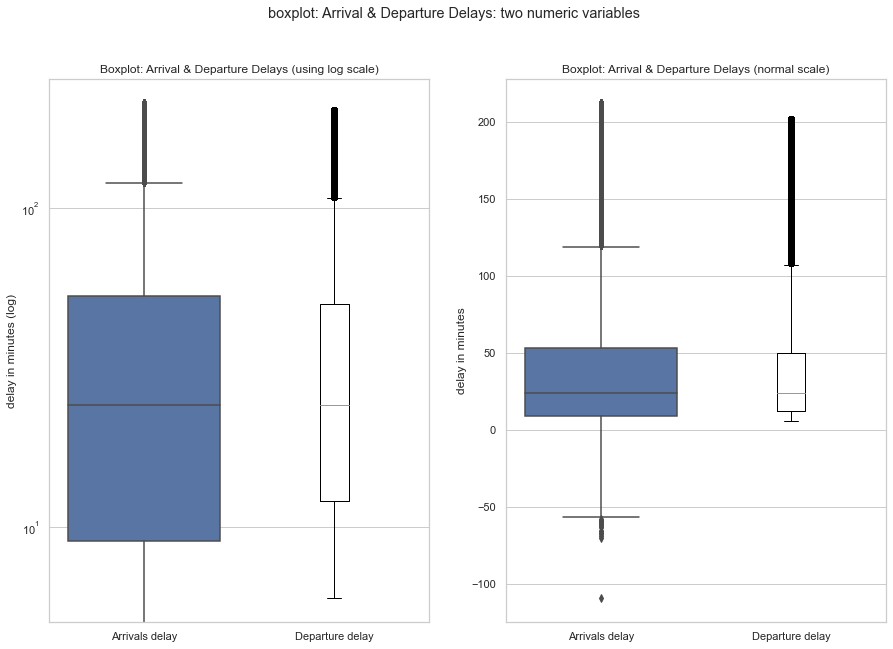

In [257]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("boxplot: Arrival & Departure Delays: two numeric variables")

#plot with log scale
sns.boxplot(ax=axes[0],y=delays_df["ArrDelay"])
axes[0].boxplot(delays_df["DepDelay"])
axes[0].set_xticklabels(["Arrivals delay", "Departure delay"])
axes[0].set_ylabel("delay in minutes (log)")
axes[0].set_title("Boxplot: Arrival & Departure Delays (using log scale)",fontsize=12)
axes[0].set_yscale("log")
axes[0].yaxis.grid(True)

sns.boxplot(ax=axes[1],y=delays_df["ArrDelay"])
axes[1].boxplot(delays_df["DepDelay"])
axes[1].set_xticklabels(["Arrivals delay", "Departure delay"])
axes[1].set_ylabel("delay in minutes")
axes[1].set_title("Boxplot: Arrival & Departure Delays (normal scale)",fontsize=12)
axes[1].yaxis.grid(True)

plt.savefig('Boxplot_Arr_Dep2.png')

plt.show()


$~$

let's plot our varibles:

$~$

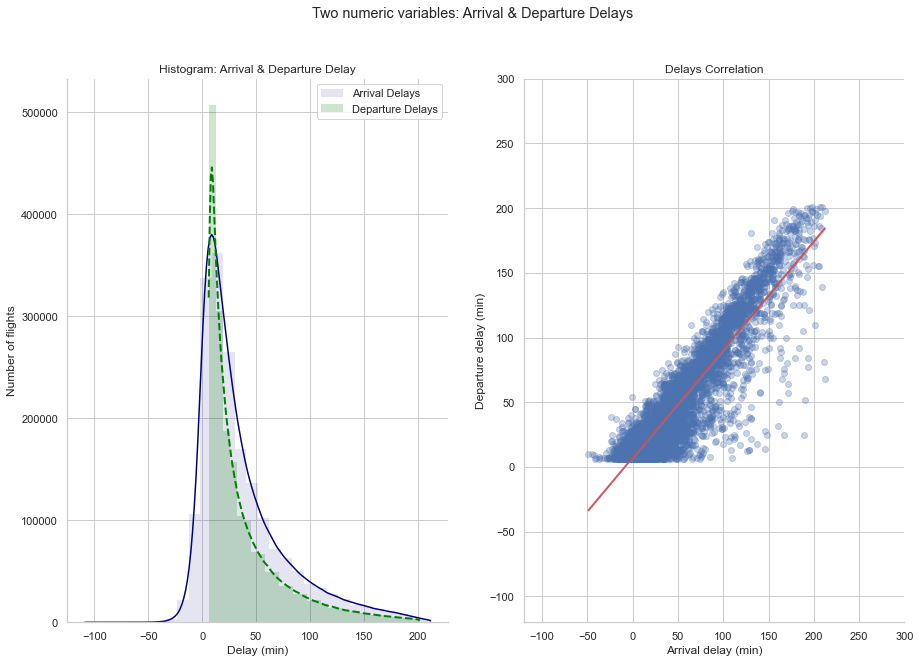

In [165]:


fig, axes = plt.subplots(1,2,figsize=(15,10))
fig.suptitle("Two numeric variables: Arrival & Departure Delays")

sns.histplot(delays_df["ArrDelay"], color="navy", label="Arrival Delays", kde=True, linewidth=0,bins=30,\
           alpha=0.1,ax=axes[0])

sns.histplot(delays_df["DepDelay"],color="green", label="Departure Delays", kde=True, linewidth=0,bins=30,\
            alpha=0.2, line_kws= {'color':'blue','linestyle': 'dashed','linewidth':2},ax=axes[0])


axes[0].set_title('Histogram: Arrival & Departure Delay')
axes[0].set_ylabel('Number of flights')
axes[0].set_xlabel("Delay (min)")
axes[0].yaxis.grid(True)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].legend(loc="best")


# Sample 10000 random lines to avoid overplotting
data = delays_df.sample(10000)




sns.regplot(x="ArrDelay", y="DepDelay", data=data, \
           line_kws={"color":"r","alpha":0.9,"lw":2},scatter_kws={'alpha':0.3},ax=axes[1])

axes[1].set_ylabel('Departure delay (min)')
axes[1].set_xlabel("Arrival delay (min)")
axes[1].set_title("Delays Correlation")

#Limits of plot range from 2 hour early to 3 hours delayed

plt.ylim(-120,300)
plt.xlim(-120,300)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

plt.savefig('Two_num_var.png')


plt.show()

$~$

+ #### Three variables (ArrDelay, DepDelay and UniqueCarrier):

$~$

let's isolate the variables (ArrDelay,DepDelay,UniqueCarrier):

$~$

In [494]:
data = df[["UniqueCarrier","ArrDelay","DepDelay"]]

data = data.groupby("UniqueCarrier")[["ArrDelay","DepDelay"]].sum()

data= data.sort_values(by="ArrDelay", ascending=False)

labels = data.index

create stacked bar chart:

$~$

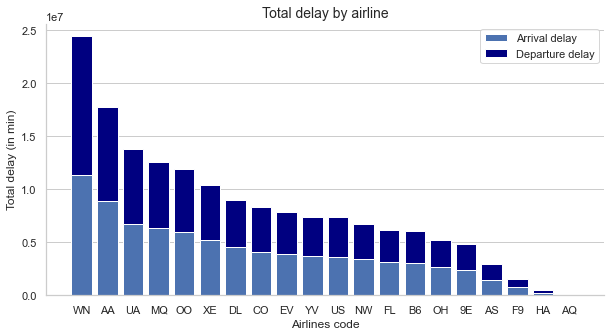

In [495]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(data.index, data["ArrDelay"],label="Arrival delay")
ax.bar(data.index, data["DepDelay"], bottom=data["ArrDelay"],label= "Departure delay",color='navy')

ax.set_ylabel("Total delay (in min)")
ax.set_xlabel("Airlines code")
ax.set_title("Total delay by airline",fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.legend(loc="best")

plt.savefig('stacker_bar.png')

plt.show()



$~$

+ #### More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier):

$~$


let's isolate the variables (ArrDelay,DepDelay,UniqueCarrier,AirTime):

In [401]:
data = df[["UniqueCarrier","ArrDelay","DepDelay","AirTime"]]

In [402]:
data = data.groupby("UniqueCarrier")[["ArrDelay","DepDelay","AirTime"]].mean()


create a Bubble Chart:

$~$

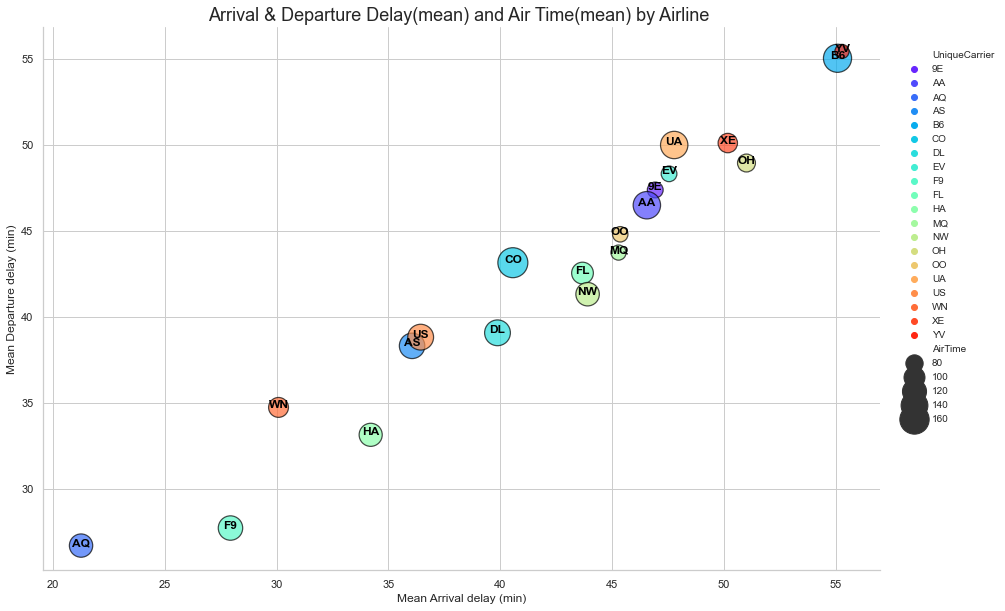

In [493]:
#Create figure


plt.figure(figsize = (15,10))

ax = sns.scatterplot(data=data, x="ArrDelay", y="DepDelay",\
                    size="AirTime", sizes=(200, 900),\
                    alpha = 0.7,
                    hue="UniqueCarrier",
                    palette="rainbow",
                    edgecolor="black",
                    )


#For each point, we add a text inside the bubble

for line in range(0,data.shape[0]):
     ax.text(data.ArrDelay[line], data.DepDelay[line], data.index[line], \
             horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.legend(title="Size")
        
plt.legend(bbox_to_anchor=(1, 1),loc='best', fontsize=10,borderaxespad=2,
           frameon=False,labelspacing=0.5)

# Add titles (main and on axis)
plt.xlabel("Mean Arrival delay (min)")
plt.ylabel("Mean Departure delay (min)")
plt.title("Arrival & Departure Delay(mean) and Air Time(mean) by Airline ", fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

plt.savefig('bubble_chat.png')

# show the graph
plt.show()


 **2 :**

    Export graphics as images or as html.


$~$






we were using plt.savefig('filename.png') before the plt.show() command.




$~$

 **3 :**

    Integrate the graphical visualizations, in task 5, of Sprint 2.


$~$





Let's remember some of the questions we answered in task 5 of Sprint 2:

$~$

+ Table of airlines with the most accumulated delays:

$~$

In [542]:
df = df.fillna(0)

#whether late or not

df["Delay"] = (df["ArrDelay"] != 0.0) & (df["DepDelay"] != 0.0)



#total time Delay:

df["Total_Delay"] = df["ArrDelay"] + df ["DepDelay"]


data = df.groupby("UniqueCarrier")[["ArrDelay","DepDelay","Total_Delay"]].count()

data = data.sort_values(by="Total_Delay",ascending=True)

print(data)

               ArrDelay  DepDelay  Total_Delay
UniqueCarrier                                 
AQ                  750       750          750
HA                 7490      7490         7490
F9                28269     28269        28269
AS                39293     39293        39293
9E                51885     51885        51885
OH                52657     52657        52657
B6                55315     55315        55315
YV                67063     67063        67063
FL                71284     71284        71284
NW                79108     79108        79108
EV                81877     81877        81877
US                98425     98425        98425
CO               100195    100195       100195
XE               103663    103663       103663
DL               114238    114238       114238
OO               132433    132433       132433
UA               141426    141426       141426
MQ               141920    141920       141920
AA               191865    191865       191865
WN           

Let's plot this table:

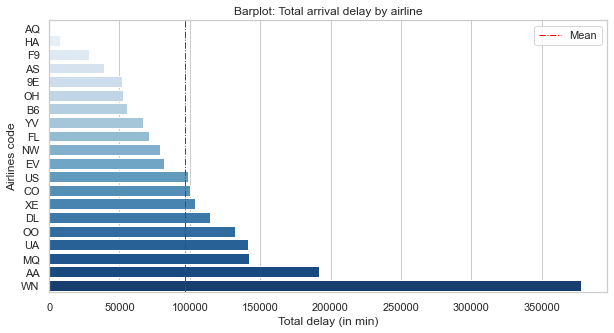

In [543]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(y=data.index , x="Total_Delay", data=data,
            palette="Blues")

ax.xaxis.grid(True)
ax.set_title("Barplot: Total arrival delay by airline",fontsize=12)
ax.set_xlabel("Total delay (in min)")
ax.set_ylabel("Airlines code") 
plt.axvline(data["Total_Delay"].mean(), color='red', linestyle='-.', linewidth= 1,label="Mean")
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')

plt.savefig('bar_plot_t5_s2.png')

plt.show()

+ Table of the longest flights:

In [579]:
data = df[["FlightNum","Distance"]]
data = df.groupby("FlightNum")["Distance"].max()

data = data.sort_values(ascending=False)

data = data.head()

data.sort_values(ascending=True)

FlightNum
1561    4502
1560    4502
850     4502
14      4962
15      4962
Name: Distance, dtype: int64

Let's plot the data:

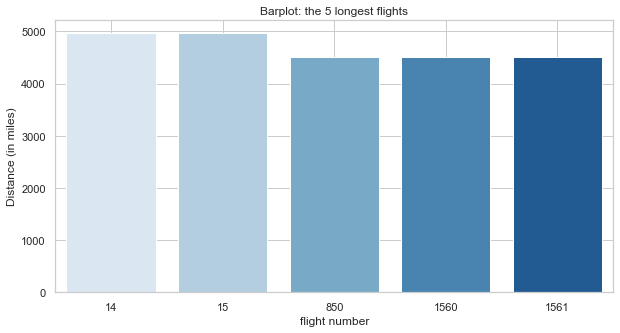

In [582]:
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(x=data.index , y=data.values,
            palette="Blues")


ax.xaxis.grid(True)
ax.set_title("Barplot: the 5 longest flights",fontsize=12)
ax.set_xlabel("flight number")
ax.set_ylabel("Distance (in miles)") 

plt.savefig('bar_plot2_t5_s2.png')

plt.show()